In [1]:
import os
from os.path import join as pj
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py
# Statistics
from evaluation.classification.statistics import get_precisions, get_size_list_from_xte
# Visualize
from evaluation.classification.visualize import plot_df_distrib_size

%matplotlib inline
plt.style.use("ggplot")

### --- compare precision with population ---

In [2]:
resnet50_minus3 = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_r45_lr1e-3_crossvalid_20200806_All_uniform30/validation_matrix.csv')
resnet50_minus4 = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_r45_lr1e-4_crossvalid_20200806_All_uniform30/validation_matrix.csv')
resnet50_minus5 = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_r45_lr1e-5_crossvalid_20200806_All_uniform30/validation_matrix.csv')

In [3]:
resnet50_minus3_precisions = get_precisions(resnet50_minus3)
resnet50_minus4_precisions = get_precisions(resnet50_minus4)
resnet50_minus5_precisions = get_precisions(resnet50_minus5)

In [4]:
exp_name = ["resnet50_minus3", "resnet50_minus4", "resnet50_minus5"]
exp_ap = [resnet50_minus3_precisions.mean(), resnet50_minus4_precisions.mean(), resnet50_minus5_precisions.mean()]

In [5]:
df = pd.DataFrame({"exp_ap": exp_ap})
df.index = exp_name
df

,exp_ap
resnet50_minus3,0.781614
resnet50_minus4,0.855642
resnet50_minus5,0.876958


In [6]:
insect_names = ['Diptera', 'Ephemeridae', 'Ephemeroptera', 'Lepidoptera', 'Plecoptera', 'Trichoptera']

In [7]:
df_per_label = pd.DataFrame({"resnet50_minus3": resnet50_minus3_precisions, "resnet50_minus4": resnet50_minus4_precisions, "resnet50_minus5": resnet50_minus5_precisions})
df_per_label.index = insect_names
df_per_label

,resnet50_minus3,resnet50_minus4,resnet50_minus5
Diptera,0.885149,0.885149,0.922772
Ephemeridae,0.867133,0.930070,0.902098
Ephemeroptera,0.617747,0.716724,0.784983
Lepidoptera,0.861614,0.926689,0.943987
Plecoptera,0.716024,0.874239,0.882353
Trichoptera,0.742015,0.800983,0.825553


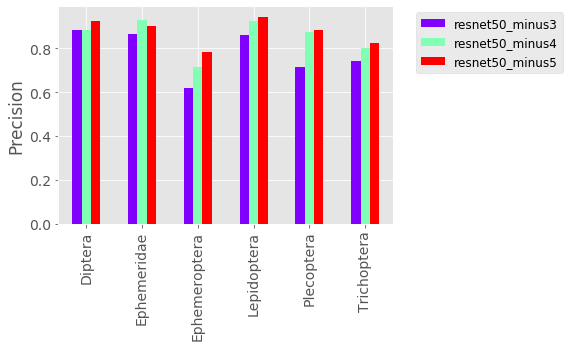

In [8]:
plt.rcParams["font.size"] = 14
df_per_label.plot(kind="bar", y=["resnet50_minus3", "resnet50_minus4", "resnet50_minus5"], cmap="rainbow")
plt.ylabel("Precision")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.savefig("/home/tanida/workspace/Insect_Phenology_Detector/result/classification/compare_lr/compare_precision_resnet50.png", bbox_inches="tight")

### --- compare accuracy distribution of size ---

In [9]:
cls_each_size_df = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_r45_lr1e-5_crossvalid_20200806/each_size_df.csv')
cls_each_size_df["order"] = cls_each_size_df["Insect_size"].apply(lambda x: np.floor(np.log2(x)))
insect_size = np.asarray(cls_each_size_df["order"])
idx, count = np.unique(insect_size, return_counts=True)
insect_size_df = pd.DataFrame({"order": idx, "count": count})
insect_size_df = insect_size_df.drop(insect_size_df.index[[0, 1]])

In [10]:
resnet50_minus3 = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_r45_lr1e-3_crossvalid_20200806_All_uniform30/all_size_df.csv')
resnet50_minus4 = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_r45_lr1e-4_crossvalid_20200806_All_uniform30/all_size_df.csv')
resnet50_minus5 = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_r45_lr1e-5_crossvalid_20200806_All_uniform30/all_size_df.csv')

In [11]:
resnet50_minus3 = resnet50_minus3.drop(resnet50_minus3.index[[0, 1]])
resnet50_minus4 = resnet50_minus4.drop(resnet50_minus4.index[[0, 1]])
resnet50_minus5 = resnet50_minus5.drop(resnet50_minus5.index[[0, 1]])

In [12]:
insect_size_df["Insect_size"] = resnet50_minus3["Insect_size"]
insect_size_df

,order,count,Insect_size
2,7.0,12,205.833333
3,8.0,51,395.039216
4,9.0,131,776.328244
5,10.0,403,1572.317618
6,11.0,1004,2982.721116
7,12.0,740,5730.868919
8,13.0,431,11417.570766
9,14.0,260,23926.192308
10,15.0,21,35455.380952


In [13]:
all_df = pd.DataFrame()
all_df["order"] = insect_size_df["order"]
all_df["count"] = insect_size_df["count"]
all_df["resnet50_minus3"] = resnet50_minus3["Accuracy"]
all_df["resnet50_minus4"] = resnet50_minus4["Accuracy"]
all_df["resnet50_minus5"] = resnet50_minus5["Accuracy"]
all_df

,order,count,resnet50_minus3,resnet50_minus4,resnet50_minus5
2,7.0,12,1.000000,1.000000,1.000000
3,8.0,51,0.784314,0.823529,0.843137
4,9.0,131,0.709924,0.763359,0.793893
5,10.0,403,0.665012,0.806452,0.796526
6,11.0,1004,0.771912,0.848606,0.883466
7,12.0,740,0.868919,0.910811,0.927027
8,13.0,431,0.897912,0.951276,0.962877
9,14.0,260,0.842308,0.923077,0.976923
10,15.0,21,0.761905,0.761905,0.952381


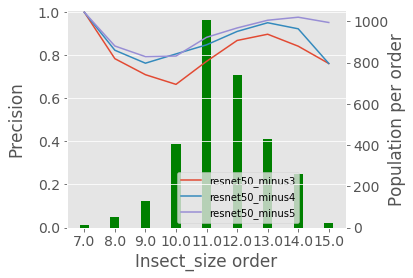

In [14]:
plt.rcParams["font.size"] = 14
fig, ax1 = plt.subplots(figsize=(5,4))
ax2 = ax1.twinx()

x_label = ["7.0", "8.0", "9.0", "10.0", "11.0", "12.0", "13.0", "14.0", "15.0"]

ax1.bar(x_label, all_df["count"], width=0.3, color="g")
ax2.plot(x_label, all_df["resnet50_minus3"], label="resnet50_minus3")
ax2.plot(x_label, all_df["resnet50_minus4"], label="resnet50_minus4")
ax2.plot(x_label, all_df["resnet50_minus5"], label="resnet50_minus5")
ax1.yaxis.tick_right()
ax2.yaxis.tick_left()

h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h2, l2, bbox_to_anchor=(0.85, 0.), loc='lower right', fontsize=10)

ax1.set_xlabel("Insect_size order")
ax1.set_ylabel("Precision")
ax1.yaxis.set_label_coords(-0.15, 0.5)
ax1.grid(False)
ax2.set_ylabel("Population per order")
ax2.set_ylim(0., 1.01)
ax2.yaxis.set_label_coords(1.15, 0.5)
plt.savefig("/home/tanida/workspace/Insect_Phenology_Detector/result/classification/compare_lr/compare_precision_distrib_of_size.png", bbox_inches="tight")